In [ ]:
#@title Imports and defaults
%matplotlib inline

from google3.pyglib import gfile
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

import platform
print("python %s" % platform.python_version())
print("matplotlib %s" % mpl.__version__)

from colabtools import adhoc_import
with adhoc_import.Google3CitcClient("bandits", "bkveton"):
  from google3.experimental.users.bkveton.bandits.simulator import *
  from google3.experimental.users.bkveton.bandits.algorithms import *
  from google3.experimental.users.bkveton.bandits.phe import *
  from google3.experimental.users.bkveton.bandits.deep import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

python 3.6.7
matplotlib 3.0.3


/google_src/cloud/bkveton/bandits/google3/third_party/py/botocore/vendored/requests/packages/urllib3/connectionpool.py:152: DeprecationWarning: invalid escape sequence \*
/google_src/cloud/bkveton/bandits/google3/third_party/py/botocore/vendored/requests/packages/urllib3/connectionpool.py:503: DeprecationWarning: invalid escape sequence \*
/google_src/cloud/bkveton/bandits/google3/third_party/py/botocore/vendored/requests/packages/urllib3/connectionpool.py:790: DeprecationWarning: invalid escape sequence \*
/google_src/cloud/bkveton/bandits/google3/third_party/py/botocore/vendored/requests/packages/urllib3/poolmanager.py:57: DeprecationWarning: invalid escape sequence \*
/google_src/cloud/bkveton/bandits/google3/third_party/py/botocore/vendored/requests/models.py:802: DeprecationWarning: invalid escape sequence \*
/google_src/cloud/bkveton/bandits/google3/third_party/py/botocore/vendored/requests/api.py:87: DeprecationWarning: invalid escape sequence \*
/google_src/cloud/bkveton/bandit

python 3.6.7
tf 2.2.0
keras 2.2.4-tf
Preprocessing dataset mnist...
60000 examples, 784 features, 10 labels
Evaluating DeepFPL.................... 417.5 seconds
Regret: 4696.05 +/- 47.11 (median: 4679.00, max: 5200.00, min: 4280.00)
Reward in last 1000 rounds: 481.30 +/- 5.88
Evaluating DeepFPL.................... 401.0 seconds
Regret: 5022.10 +/- 46.05 (median: 5045.00, max: 5462.00, min: 4554.00)
Reward in last 1000 rounds: 519.90 +/- 5.92
Evaluating NeuralLinear.................... 460.9 seconds
Regret: 4350.90 +/- 67.39 (median: 4271.00, max: 5081.00, min: 3852.00)
Reward in last 1000 rounds: 457.05 +/- 8.28


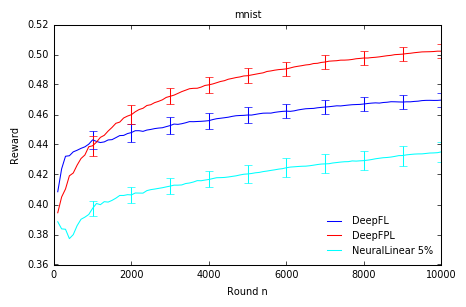

python 3.6.7
tf 2.2.0
keras 2.2.4-tf
Preprocessing dataset fashion_mnist...
60000 examples, 784 features, 10 labels
Evaluating DeepFPL.................... 401.4 seconds
Regret: 4531.30 +/- 51.49 (median: 4605.00, max: 4861.00, min: 3967.00)
Reward in last 1000 rounds: 460.90 +/- 8.37
Evaluating DeepFPL.................... 403.1 seconds
Regret: 4869.45 +/- 70.14 (median: 4908.00, max: 5245.00, min: 3999.00)
Reward in last 1000 rounds: 509.90 +/- 8.45
Evaluating NeuralLinear.................... 463.3 seconds
Regret: 4355.55 +/- 63.80 (median: 4369.00, max: 4763.00, min: 3783.00)
Reward in last 1000 rounds: 466.35 +/- 9.55


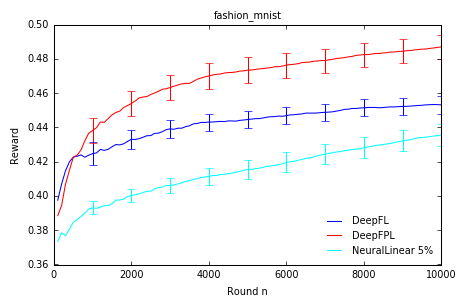

In [ ]:
# experiments
num_runs = 20
n = 10000

# neural nets
hidden_nodes = "50-50"
hidden_activation = "relu"
optimizer = "adam"
lr = 0.001
batch_size = 32
deeps = [
  ("DeepFPL",
  {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  "optimizer": optimizer, "lr": lr, "batch_size": batch_size},
  "blue", "-", "DeepFL"),
  ("DeepFPL",
  {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  "optimizer": optimizer, "lr": lr, "batch_size": batch_size, "a": 1.0},
  "red", "-", "DeepFPL"),
  ("NeuralLinear",
  {"hidden_nodes": hidden_nodes, "hidden_activation": hidden_activation,
  "lr": lr, "batch_size": batch_size, "a": 1.0, "relepe": int(0.05 * n)},
  "cyan", "-", "NeuralLinear 5%")]

step = 100 * (np.arange(n // 100) + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

for dataset in ["iris", "digit_recognition", "mnist", "fashion_mnist"][2 :]:
  # create environment
  X, y = load_dataset(dataset)
  num_labels = int(y.max()) + 1

  for alg in deeps:
    env = []
    for run in range(num_runs):
      c = run % num_labels
      env.append(BinaryClassBandit(X, y, pos_label=c, K=10, pos_prob=0.65))

    alg_class = globals()[alg[0]]
    reward, _ = evaluate(alg_class, alg[1], env, n)
    print("Reward in last %d rounds: %.2f +/- %.2f" %
      (n // 10, reward[- n // 10 :, :].sum(axis=0).mean(), \
      reward[- n // 10 :, :].sum(axis=0).std() / np.sqrt(num_runs)))

    cum_reward = reward.cumsum(axis=0)[step - 1, :] / step[:, np.newaxis]
    plt.plot(step, cum_reward.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]), label=alg[4])
    plt.errorbar(step[sube], cum_reward[sube, :].mean(axis=1),
      cum_reward[sube, :].std(axis=1) / np.sqrt(cum_reward.shape[1]),
      fmt="none", ecolor=alg[2])

  plt.title("%s" % dataset)
  plt.xlabel("Round n")
  plt.ylabel("Reward")
  plt.legend(loc="lower right", frameon=False)
  plt.show()